In [113]:
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [114]:
data =  pd.read_csv(r"C:\Users\Deepak\Desktop\microsoft\GUIDE_Test.csv")

C:\Users\Deepak\AppData\Local\Temp\ipykernel_27160\1335377836.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data =  pd.read_csv(r"C:\Users\Deepak\Desktop\microsoft\GUIDE_Test.csv")


In [115]:
data.shape

(4147992, 46)

In [116]:
data = data.head(30000)

In [117]:
data.shape

(30000, 46)

In [118]:
list(data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City',
 'Usage']

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  30000 non-null  int64  
 1   OrgId               30000 non-null  int64  
 2   IncidentId          30000 non-null  int64  
 3   AlertId             30000 non-null  int64  
 4   Timestamp           30000 non-null  object 
 5   DetectorId          30000 non-null  int64  
 6   AlertTitle          30000 non-null  int64  
 7   Category            30000 non-null  object 
 8   MitreTechniques     13364 non-null  object 
 9   IncidentGrade       30000 non-null  object 
 10  ActionGrouped       13 non-null     object 
 11  ActionGranular      13 non-null     object 
 12  EntityType          30000 non-null  object 
 13  EvidenceRole        30000 non-null  object 
 14  DeviceId            30000 non-null  int64  
 15  Sha256              30000 non-null  int64  
 16  IpAd

In [120]:
data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,3.000000e+04,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,2.870000e+02,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,8.547374e+11,177.411300,69118.671567,4.075789e+05,99.054267,2504.237333,95823.207033,128290.871067,287207.179833,150525.958433,354980.748300,473252.686567,343727.055533,360111.67580,141504.580800,483042.243867,3.266379e+09,1628.123167,634.475500,859.165600,2198.04290,3338.480300,880.739133,261834.442133,107424.768033,3582.771267,4.903400,64.719933,222.245633,1344.005600,9880.620400
std,4.930363e+11,370.793814,119035.870560,4.536374e+05,396.945877,10405.230667,16023.823684,34718.549136,140120.444134,37125.068455,164903.940622,287366.566097,158275.523689,172558.29623,39130.248465,137514.482162,1.000259e+09,67.172132,17.983744,26.178996,340.80797,524.045382,14.579267,82255.454916,32585.441360,104.414823,0.686501,9.088516,64.996261,363.737103,2702.770735
min,4.100000e+01,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.598851e+07,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.209068e+11,8.000000,421.000000,2.335025e+04,2.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,108609.500000,425863.000000,453297.00000,153085.000000,529644.000000,2.737872e+09,1631.000000,635.000000,860.000000,2251.00000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
50%,8.418136e+11,43.000000,9172.000000,2.283090e+05,8.000000,9.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.00000,153085.000000,529644.000000,3.516651e+09,1631.000000,635.000000,860.000000,2251.00000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
75%,1.279900e+12,174.000000,82429.250000,6.696682e+05,40.000000,113.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.00000,153085.000000,529644.000000,4.138098e+09,1631.000000,635.000000,860.000000,2251.00000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
max,1.709397e+12,5890.000000,597748.000000,1.721001e+06,9425.000000,113027.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.00000,153085.000000,529644.000000,4.293982e+09,1631.000000,635.000000,860.000000,2251.00000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000


In [121]:
pd.set_option('display.max_columns', None)
data.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [122]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'MitreTechniques', 'IncidentGrade',
       'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'EmailClusterId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'ThreatFamily', 'FileName', 'FolderPath',
       'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [123]:
data.shape

(30000, 46)

DATA HANDLING STAGE

In [124]:
condition = len(data)

In [125]:
condition = condition*0.5

In [126]:
data = data.dropna(thresh = condition, axis =1)

In [127]:
data.shape

(30000, 36)

In [128]:
s = data.isnull().sum()

In [129]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage'],
      dtype='object')

In [130]:
len(data.columns)

36

In [131]:
data.duplicated().sum()

11

In [132]:
data.drop_duplicates(inplace =True)

In [133]:
data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,438086669112,4,270,448,2024-05-23T04:38:46.000Z,8,7,InitialAccess,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,293,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
29996,1494648620786,0,85,107902,2024-06-06T21:04:35.000Z,0,0,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
29997,1365799604974,276,39715,1254730,2024-06-14T00:35:50.000Z,0,0,InitialAccess,FalsePositive,CloudLogonRequest,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
29998,412316864390,14,3879,2969,2024-05-31T22:57:24.000Z,29,20,Impact,TruePositive,Ip,Related,98799,138268,5724,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29989 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  29989 non-null  int64 
 1   OrgId               29989 non-null  int64 
 2   IncidentId          29989 non-null  int64 
 3   AlertId             29989 non-null  int64 
 4   Timestamp           29989 non-null  object
 5   DetectorId          29989 non-null  int64 
 6   AlertTitle          29989 non-null  int64 
 7   Category            29989 non-null  object
 8   IncidentGrade       29989 non-null  object
 9   EntityType          29989 non-null  object
 10  EvidenceRole        29989 non-null  object
 11  DeviceId            29989 non-null  int64 
 12  Sha256              29989 non-null  int64 
 13  IpAddress           29989 non-null  int64 
 14  Url                 29989 non-null  int64 
 15  AccountSid          29989 non-null  int64 
 16  AccountUpn          29989 n

In [135]:
data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,2.998900e+04,29989.000000,29989.000000,2.998900e+04,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000
mean,8.547456e+11,177.365767,69121.691587,4.077059e+05,99.081163,2505.147154,95822.115509,128287.211444,287180.257061,150530.446730,354974.542332,473285.194571,343721.302344,360103.564840,141500.333089,483072.355364,1628.122111,634.475308,859.165294,2198.023475,3338.450032,880.739038,261824.267598,107421.010804,3582.770082,4.903365,64.719464,222.238387,1343.968555,9880.345527
std,4.930124e+11,370.797145,119049.851401,4.536708e+05,397.013815,10407.030336,16026.660915,34724.390213,140139.087667,37118.947735,164909.666289,287349.998178,158281.207089,172565.213772,39136.795870,137470.938720,67.184428,17.987039,26.183792,340.868961,524.139103,14.581940,82268.823793,32590.826525,104.433953,0.686625,9.090149,65.007079,363.798665,2703.228281
min,4.100000e+01,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.209068e+11,8.000000,421.000000,2.335400e+04,2.000000,2.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,108698.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
50%,8.418136e+11,43.000000,9148.000000,2.285370e+05,8.000000,9.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
75%,1.279900e+12,174.000000,82429.000000,6.698290e+05,40.000000,113.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000
max,1.709397e+12,5890.000000,597748.000000,1.721001e+06,9425.000000,113027.000000,98799.000000,138268.000000,360606.000000,160396.000000,441377.000000,673934.000000,425863.000000,453297.000000,153085.000000,529644.000000,1631.000000,635.000000,860.000000,2251.000000,3421.000000,881.000000,289573.000000,117668.000000,3586.000000,5.000000,66.000000,242.000000,1445.000000,10630.000000


In [136]:
# to fill th value in incidentGrade column
data["IncidentGrade"].fillna(data["IncidentGrade"].mode()[0],inplace=True)

C:\Users\Deepak\AppData\Local\Temp\ipykernel_27160\4145452890.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["IncidentGrade"].fillna(data["IncidentGrade"].mode()[0],inplace=True)


Timestamp  convert to datetime

In [137]:
data['Timestamp']=pd.to_datetime(data['Timestamp']) # data clean Timestamp

In [138]:
data['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [139]:
data.Timestamp.tail()

29995   2024-05-23 04:38:46+00:00
29996   2024-06-06 21:04:35+00:00
29997   2024-06-14 00:35:50+00:00
29998   2024-05-31 22:57:24+00:00
29999   2024-06-10 02:03:38+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [140]:
# to perform the datatime operation
data["Day"]=data["Timestamp"].dt.day
data["Month"]=data["Timestamp"].dt.month
data["Year"]=data["Timestamp"].dt.year
data["Hour"]=data["Timestamp"].dt.hour
data["Time"]=data["Timestamp"].dt.time

In [141]:
data.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
Day                   0
Month                 0
Year                  0
Hour                  0
Time                  0
dtype: int64

In [142]:
# to get the isnull.sum()>0 columns to get
[temp for temp  in data.columns if data[temp].isnull().sum()>0]

[]

In [143]:
# to  remove the timestamp columns
data.drop('Timestamp', axis =1, inplace=True)
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05


In [144]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Usage', 'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [145]:
istrue = False
for  tem in data.columns:
     if tem == 'Timestamp':
        istrue = true
if istrue:
    print("The column is not deleted")
else:
    print("the column is deleted")

the column is deleted


In [146]:
pd.set_option("display.max_columns", None)
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public,6,6,2024,17,17:42:05


In [147]:
data.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

In [148]:
data.IncidentGrade.value_counts()

IncidentGrade
BenignPositive    12663
TruePositive      10791
FalsePositive      6535
Name: count, dtype: int64

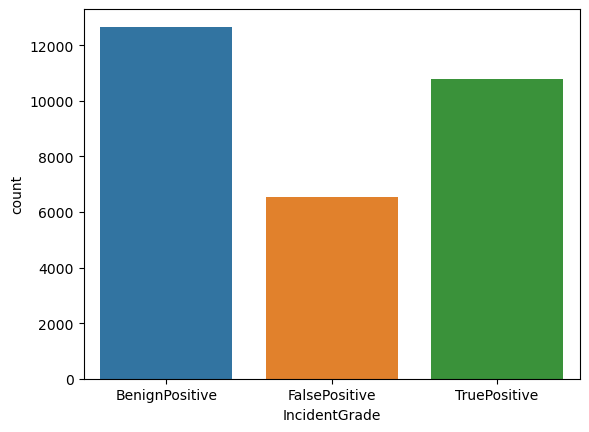

In [149]:
sns.countplot(x = 'IncidentGrade', data = data)
plt.show()

Aggregate Operation

In [150]:
    # Plot
def  visualize(day_incident_grade):
   day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
   plt.xlabel('Day of the Month')
   plt.ylabel('Count')
   plt.title('IncidentGrade Counts Across Days of the Month')
   plt.legend(title='IncidentGrade')
   plt.grid(True)
   plt.show()

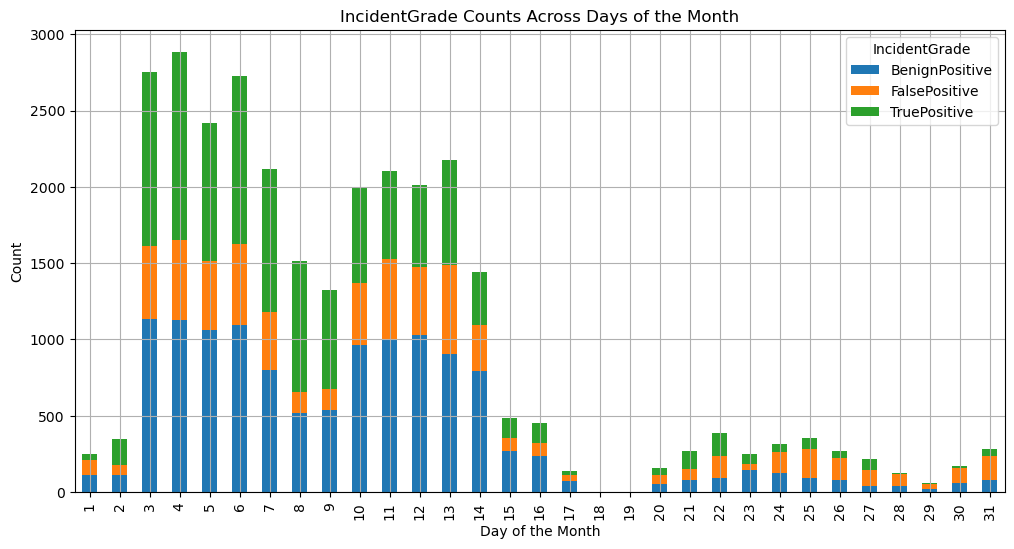

In [151]:
dig= data.groupby(['Day', 'IncidentGrade']).size().unstack()
visualize(dig)

In [152]:
    # Plot
def  visualize_1(day_incident_grade):
   day_incident_grade.plot(kind='line', stacked=True, figsize=(12, 6))
   plt.xlabel('Day of the Month')
   plt.ylabel('Count')
   plt.title('IncidentGrade Counts Across Days of the Month')
   plt.legend(title='IncidentGrade')
   plt.grid(True)
   plt.show()

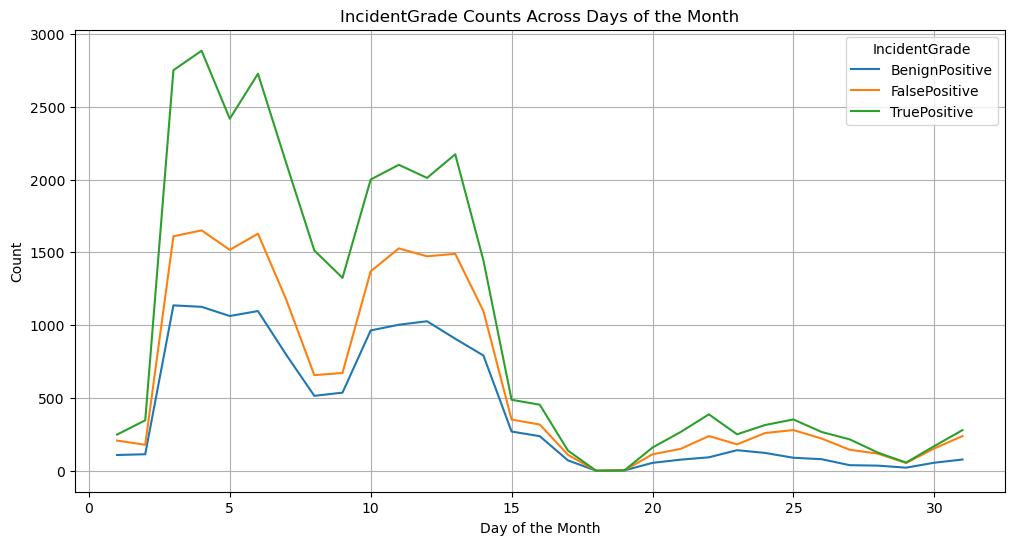

In [153]:
visualize_1(dig)

In [154]:
# to check the  hour wise incident
def visualize_h(hour_incident):
   hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
   plt.xlabel("Hour of Day")
   plt.ylabel('Count')
   plt.title('IncidentGrade Counts Across Hours of the Day')
   plt.legend(title="IncidentGrade")
   plt.grid(True)
   plt.show()

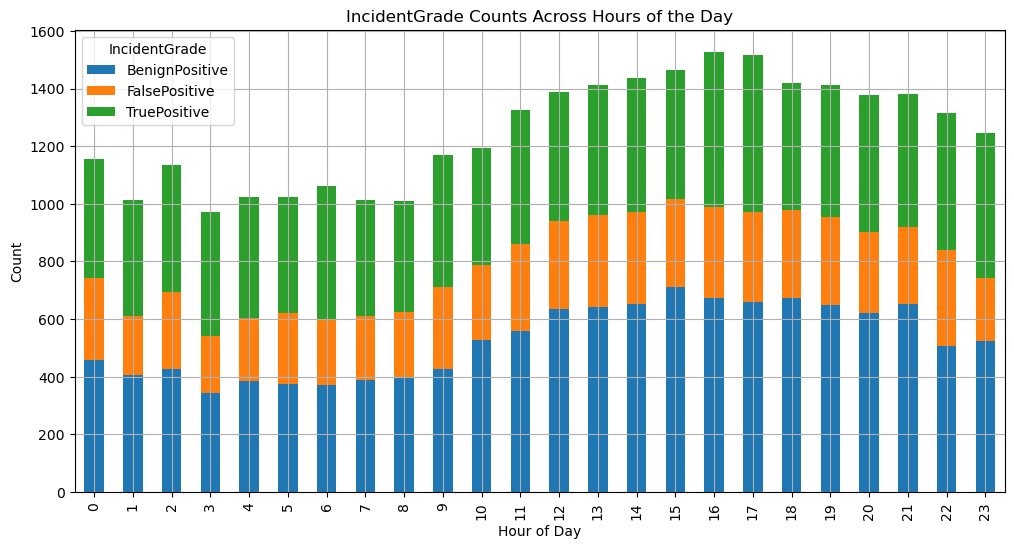

In [155]:
# group by the hour wise incident
hourwise_incident =data.groupby(['Hour', 'IncidentGrade']).size().unstack()
visualize_h(hourwise_incident)

In [156]:
# to check the  hour wise incident
def visualize_hh(hour_incident):
   hour_incident.plot(kind='line', stacked=True, figsize=(12,6))
   plt.xlabel("Hour of Day")
   plt.ylabel('Count')
   plt.title('IncidentGrade Counts Across Hours of the Day')
   plt.legend(title="IncidentGrade")
   plt.grid(True)
   plt.show()

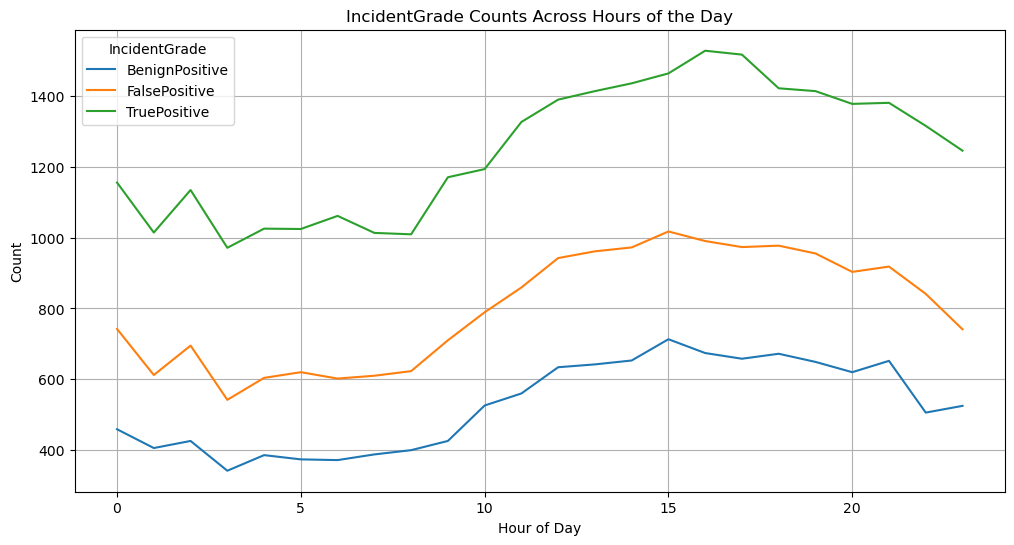

In [157]:
visualize_hh(hourwise_incident)

Correction Matrix Operation

In [158]:
num_df = data.select_dtypes(include= ['number'])
corr_matrix = num_df.corr().abs()


C:\Users\Deepak\anaconda3\anacoonda4\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


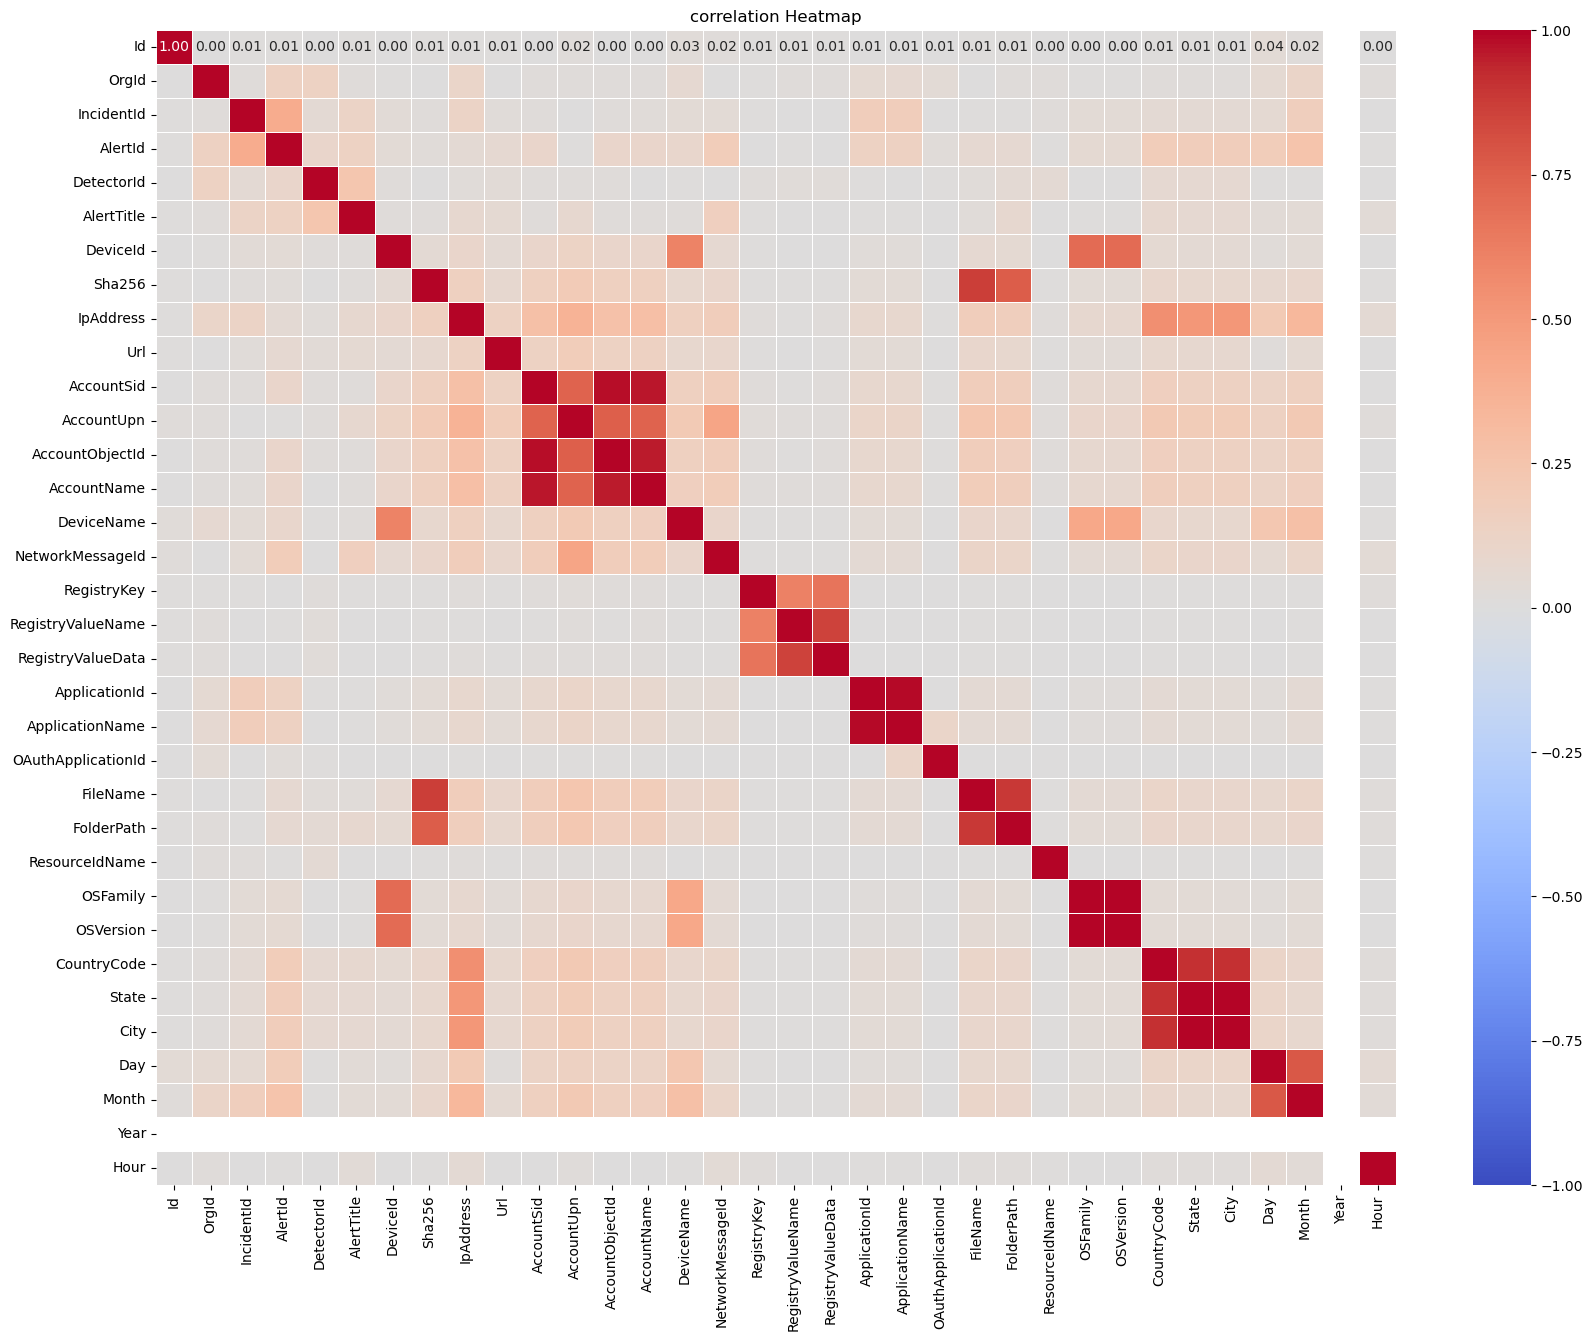

In [159]:
# plot the  heatmap of the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [160]:
# based on the above the heatmap to  remove the 70%  correlated columns
# dropping 70% above correlated columns
data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [161]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'City', 'Usage',
       'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [162]:
len(data.columns) before 36 now 29 only

SyntaxError: invalid syntax (2485100061.py, line 1)

In [163]:
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,Public,6,6,2024,17,17:42:05


Endoing and data preprocessing

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29989 entries, 0 to 29999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  29989 non-null  int64 
 1   OrgId               29989 non-null  int64 
 2   IncidentId          29989 non-null  int64 
 3   AlertId             29989 non-null  int64 
 4   DetectorId          29989 non-null  int64 
 5   AlertTitle          29989 non-null  int64 
 6   Category            29989 non-null  object
 7   IncidentGrade       29989 non-null  object
 8   EntityType          29989 non-null  object
 9   EvidenceRole        29989 non-null  object
 10  DeviceId            29989 non-null  int64 
 11  IpAddress           29989 non-null  int64 
 12  Url                 29989 non-null  int64 
 13  AccountName         29989 non-null  int64 
 14  DeviceName          29989 non-null  int64 
 15  NetworkMessageId    29989 non-null  int64 
 16  RegistryKey         29989 n

In [165]:
data.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Day,Month,Year,Hour
count,2.998900e+04,29989.000000,29989.000000,2.998900e+04,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.000000,29989.0,29989.000000
mean,8.547456e+11,177.365767,69121.691587,4.077059e+05,99.081163,2505.147154,95822.115509,287180.257061,150530.446730,360103.564840,141500.333089,483072.355364,1628.122111,859.165294,2198.023475,880.739038,261824.267598,3582.770082,9880.345527,9.735203,5.903798,2024.0,12.263697
std,4.930124e+11,370.797145,119049.851401,4.536708e+05,397.013815,10407.030336,16026.660915,140139.087667,37118.947735,172565.213772,39136.795870,137470.938720,67.184428,26.183792,340.868961,14.581940,82268.823793,104.433953,2703.228281,6.243236,0.300918,0.0,6.774209
min,4.100000e+01,0.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2024.0,0.000000
25%,4.209068e+11,8.000000,421.000000,2.335400e+04,2.000000,2.000000,98799.000000,360606.000000,160396.000000,453297.000000,153085.000000,529644.000000,1631.000000,860.000000,2251.000000,881.000000,289573.000000,3586.000000,10630.000000,5.000000,6.000000,2024.0,7.000000
50%,8.418136e+11,43.000000,9148.000000,2.285370e+05,8.000000,9.000000,98799.000000,360606.000000,160396.000000,453297.000000,153085.000000,529644.000000,1631.000000,860.000000,2251.000000,881.000000,289573.000000,3586.000000,10630.000000,8.000000,6.000000,2024.0,13.000000
75%,1.279900e+12,174.000000,82429.000000,6.698290e+05,40.000000,113.000000,98799.000000,360606.000000,160396.000000,453297.000000,153085.000000,529644.000000,1631.000000,860.000000,2251.000000,881.000000,289573.000000,3586.000000,10630.000000,13.000000,6.000000,2024.0,18.000000
max,1.709397e+12,5890.000000,597748.000000,1.721001e+06,9425.000000,113027.000000,98799.000000,360606.000000,160396.000000,453297.000000,153085.000000,529644.000000,1631.000000,860.000000,2251.000000,881.000000,289573.000000,3586.000000,10630.000000,31.000000,6.000000,2024.0,23.000000


In [166]:
# to convert the categorical columns into numerical columns

In [167]:
data.select_dtypes(include= ['object'])

,Category,IncidentGrade,EntityType,EvidenceRole,Usage,Time
0,LateralMovement,BenignPositive,User,Impacted,Private,22:56:27
1,CommandAndControl,BenignPositive,Machine,Impacted,Public,12:58:26
2,LateralMovement,BenignPositive,Process,Related,Public,03:20:49
3,InitialAccess,FalsePositive,CloudLogonSession,Related,Public,12:07:31
4,Discovery,BenignPositive,User,Impacted,Public,17:42:05
...,...,...,...,...,...,...
29995,InitialAccess,BenignPositive,Machine,Impacted,Private,04:38:46
29996,InitialAccess,TruePositive,CloudLogonRequest,Related,Public,21:04:35
29997,InitialAccess,FalsePositive,CloudLogonRequest,Related,Public,00:35:50
29998,Impact,TruePositive,Ip,Related,Private,22:57:24


In [168]:
data.select_dtypes(include= ['object']).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time'],
      dtype='object')

In [169]:
len(data.columns)

29

In [170]:
cat_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Usage',
       'Time']

In [171]:
# to perform the Lable Encoder

In [172]:
encoders = {}
for i in cat_cols:
    le = LabelEncoder()
    data[i]=le.fit_transform(data[i])
    encoders[i]=le

In [173]:
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,21,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,21274
1,1400159342154,3,91158,632273,2,2,1,0,9,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,10855
2,1279900255923,145,32247,131719,2932,10807,11,0,16,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,2744
3,60129547292,222,15294,917686,0,0,10,1,5,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,9989
4,515396080539,363,7615,5944,27,18,5,0,21,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,16001


In [174]:
len(data.columns)

29

In [175]:
# to selcet the numerical columns 
data.select_dtypes(include =['int32','int64'])

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,21,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,21274
1,1400159342154,3,91158,632273,2,2,1,0,9,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,10855
2,1279900255923,145,32247,131719,2932,10807,11,0,16,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,2744
3,60129547292,222,15294,917686,0,0,10,1,5,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,9989
4,515396080539,363,7615,5944,27,18,5,0,21,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,16001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,438086669112,4,270,448,8,7,10,0,9,0,98799,360606,160396,453297,293,529644,1631,860,2251,881,289573,3586,10630,0,23,5,2024,4,3747
29996,1494648620786,0,85,107902,0,0,10,2,4,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,21,19504
29997,1365799604974,276,39715,1254730,0,0,10,1,4,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,14,6,2024,0,509
29998,412316864390,14,3879,2969,29,20,9,2,8,1,98799,5724,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,0,31,5,2024,22,21288


In [176]:
data.select_dtypes(include =['int32','int64']).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'IpAddress', 'Url', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'OAuthApplicationId', 'FileName', 'ResourceIdName', 'City', 'Usage',
       'Day', 'Month', 'Year', 'Hour', 'Time'],
      dtype='object')

In [177]:
len(data.select_dtypes(include =['int32','int64']).columns)

29

In [178]:
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationId,OAuthApplicationId,FileName,ResourceIdName,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,21,0,98799,360606,160396,863,153085,529644,1631,860,2251,881,289573,3586,10630,0,4,6,2024,22,21274
1,1400159342154,3,91158,632273,2,2,1,0,9,0,1239,360606,160396,453297,2833,529644,1631,860,2251,881,289573,3586,10630,1,3,6,2024,12,10855
2,1279900255923,145,32247,131719,2932,10807,11,0,16,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,14,3586,10630,1,8,6,2024,3,2744
3,60129547292,222,15294,917686,0,0,10,1,5,1,98799,360606,160396,453297,153085,529644,1631,860,2251,881,289573,3586,10630,1,12,6,2024,12,9989
4,515396080539,363,7615,5944,27,18,5,0,21,0,98799,360606,160396,136104,153085,529644,1631,860,2251,881,289573,3586,10630,1,6,6,2024,17,16001


In [179]:
# RandomOverSmaple

In [180]:
from imblearn.over_sampling import RandomOverSampler

In [181]:
over =RandomOverSampler(random_state = 42)

In [182]:
ip = data.drop('IncidentGrade', axis = 1)

In [183]:
op = data.IncidentGrade

In [184]:
ip.shape

(29989, 28)

In [185]:
op.shape

(29989,)

In [186]:
op.unique()

array([0, 1, 2])

In [187]:
op.value_counts() # before 

IncidentGrade
0    12663
2    10791
1     6535
Name: count, dtype: int64

In [188]:
oip,oop = over.fit_resample(ip,op)

In [189]:
oop.value_counts() # after

IncidentGrade
0    12663
1    12663
2    12663
Name: count, dtype: int64

FEATURE  SELECTION 

In [190]:
RF = RandomForestClassifier(n_estimators = 300 , random_state = 42)

In [191]:
RF.fit(oip,oop)

RandomForestClassifier(n_estimators=300, random_state=42)

In [192]:
pd.DataFrame({
    "columns": oip.columns,
    "Score": RF.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()

['OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'Id',
 'Day',
 'Time',
 'Category',
 'Hour',
 'EntityType',
 'AccountName',
 'IpAddress',
 'DeviceName',
 'NetworkMessageId']

In [193]:
oip=oip[['OrgId',
 'IncidentId',
 'DetectorId',
 'AlertId',
 'AlertTitle',
 'Id',
 'Day',
 'Category',
 'Time',
 'Hour',
 'AccountName',
 'EntityType',
 'IpAddress',
 'DeviceName',
 'FileName']]

In [194]:
oip

,OrgId,IncidentId,DetectorId,AlertId,AlertTitle,Id,Day,Category,Time,Hour,AccountName,EntityType,IpAddress,DeviceName,FileName
0,657,11767,524,87199,563,1245540519230,4,11,21274,22,863,21,360606,153085,289573
1,3,91158,2,632273,2,1400159342154,3,1,10855,12,453297,9,360606,2833,289573
2,145,32247,2932,131719,10807,1279900255923,8,11,2744,3,453297,16,360606,153085,14
3,222,15294,0,917686,0,60129547292,12,10,9989,12,453297,5,360606,153085,289573
4,363,7615,27,5944,18,515396080539,6,5,16001,17,136104,21,360606,153085,289573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37984,1177,6629,535,8989,407,910533069954,7,0,22001,23,453297,6,360606,153085,217976
37985,22,345286,4,406888,3,1168231105205,4,10,3384,4,667,21,360606,153085,289573
37986,0,235,7,123222,6,1219770713810,4,10,11519,13,453297,4,360606,153085,289573
37987,23,225,0,313371,0,798863919139,4,10,21839,23,453297,4,360606,153085,289573


In [195]:
oip.shape

(37989, 15)

Train and Test Split

In [196]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oip,oop, test_size = 0.20, random_state = 42)

In [197]:
traindata.shape

(30391, 15)

In [198]:
testdata.shape

(7598, 15)

Model Building Stage

In [199]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

In [200]:
tree_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

In [201]:
tree_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

Metrices and Accuray

In [202]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [203]:
dttr_pred =tree_model.predict(traindata)
dtts_pred =tree_model.predict(testdata)

In [204]:
dttrain_metrics=metrics(trainlab,dttr_pred)

In [205]:
dttrain_metrics

,Values
Metrics,
Accuracy,66.342009
Precision,71.341847
Recall,66.357571
Macro F1,66.724946


In [206]:
dttest_metrics=metrics(testlab,dtts_pred)

In [207]:
dttest_metrics

,Values
Metrics,
Accuracy,66.793893
Precision,71.496136
Recall,66.737598
Macro F1,67.228656


In [208]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,66.342009,66.793893
1,Precision,71.341847,71.496136
2,Recall,66.357571,66.737598
3,Macro F1,66.724946,67.228656


RANDOM FOREST MODEL

In [209]:
RF = RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

In [210]:
RF.fit(traindata, trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [211]:
rtrain_pred = RF.predict(traindata)
rtest_pred  = RF.predict(testdata)

In [212]:
rtrain_metrics = metrics(trainlab,rtrain_pred)
rtest_metrics = metrics(testlab , rtest_pred)

In [213]:
rtrain_metrics

,Values
Metrics,
Accuracy,82.323714
Precision,86.417560
Recall,82.337401
Macro F1,82.686484


In [214]:
rtest_metrics

,Values
Metrics,
Accuracy,80.876546
Precision,84.843893
Recall,80.824944
Macro F1,81.215148


In [215]:
# metrics of the randomoforest model
pd.DataFrame({
    "Training":rtrain_metrics["Values"],
    "Testing":rtest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,82.323714,80.876546
1,Precision,86.417560,84.843893
2,Recall,82.337401,80.824944
3,Macro F1,82.686484,81.215148


XGBoost

In [216]:
# XGBoost model

In [217]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [218]:
xgbmodel.fit(traindata,trainlab)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [219]:
xgbtrain_pred =xgbmodel.predict(traindata)
xgbtest_pred =xgbmodel.predict(testdata)

In [220]:
xgbtrain_metrics = metrics(trainlab,xgbtrain_pred)

In [221]:
xgbtest_metrics = metrics(testlab, xgbtest_pred)

In [222]:
xgbtrain_metrics

,Values
Metrics,
Accuracy,97.828304
Precision,97.840504
Recall,97.830033
Macro F1,97.829330


In [223]:
xgbtest_metrics

,Values
Metrics,
Accuracy,92.090024
Precision,92.196014
Recall,92.078536
Macro F1,92.103178


In [224]:
pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,97.828304,92.090024
1,Precision,97.840504,92.196014
2,Recall,97.830033,92.078536
3,Macro F1,97.829330,92.103178


In [225]:
# The Model will perform on the testing dataset will perform on training 98%  and test 92%